In [1]:
import ROOT,os,glob,math

Welcome to JupyROOT 6.18/00


In [2]:
txt="txt/data5ZXDATA.txt"
f=open(txt,"r")
outxt=list(f.readlines())
#print outxt
count=0
for i,j in enumerate(outxt):
    if histname in j:
        #print i,j
        count=i
chi2=outxt[count+1].split(" ")[-1].replace("\n","")

NameError: name 'histname' is not defined

In [4]:
path="/eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/"
files=glob.glob(path+"*root")
#print files
#print files[13],files
path1="DATAmass.root"
#Not good:0,1
print files[0],files[1],files[5],files[6],files[7],files[12],files[13],files[18],files[19]
print files[5]

/eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zee_data_highZPt100_LeadB_Xmass.root /eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zee_data_highZPt100_LeadB_Xpmass.root /eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zee_data_highZPt100_LeadFatJ_Xpmass.root /eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zee_data_highZPt100_LeadFatJ_ZXmass.root /eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zee_data_highZPt100_LeadFatJ_ZXpmass.root /eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zmm_data_highZPt100_LeadB_Xmass.root /eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zmm_data_highZPt100_LeadB_Xpmass.root /eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zmm_data_highZPt100_LeadFatJ_ZXmass.root /eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zmm_data_highZPt100_LeadFatJ_ZXpmass.root
/eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zee_data_highZPt100_LeadFatJ_Xpmass.root


24 /eos/user/d/ding/SWAN_projects/ZplusX/data5/rootfileDATA/Zee_data_highZPt100_LeadFatJ_Xpmass.root
Zee LeadFatJ Xpmass


Info in <TCanvas::Print>: pdf file figuresDATA/Zee_data_highZPt100_LeadFatJ_Xpmass.pdf has been created


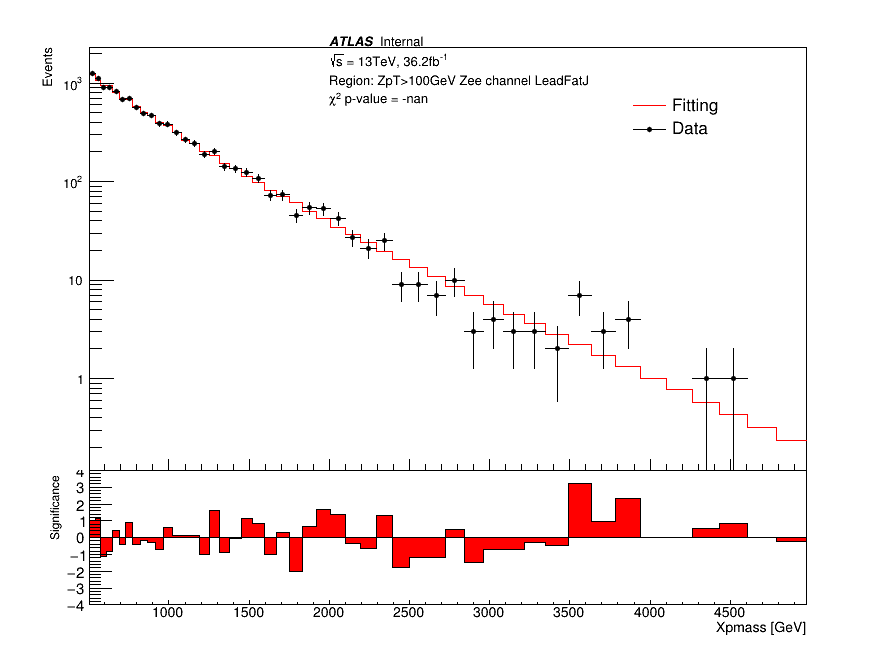

In [5]:
selectfile=files[5]
print len(files),selectfile
StrTitle=selectfile.split("/")[-1].split("_")
Zem=StrTitle[0]
LeadBJ=StrTitle[3]
MasStr=StrTitle[4].split(".")[0]
print Zem,LeadBJ,MasStr
f=ROOT.TFile(selectfile,"r")
f1=ROOT.TFile(path1,"r")
histname=selectfile.split("/")[-1].split(".")[0]
h1=f.Get("globalFitAlternate")
h2=f1.Get(histname)

txt="txt/data5ZXDATA.txt"
ftxt=open(txt,"r")
outxt=list(ftxt.readlines())
#print outxt
count=0
for i,j in enumerate(outxt):
    if histname in j:
        #print i,j
        count=i
chi2=outxt[count+1].split(" ")[-1].replace("\n","")

c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit();
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # joins upper and lower plot
pad1.Draw()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.2)
pad2.Draw()

Low=505
High=4975
#High=4790
pad1.cd()
pad1.SetLogy()
h1.SetNameTitle("","")
h1.GetXaxis().SetRangeUser(Low,High)
h2.GetXaxis().SetRangeUser(Low,High)
#h1.GetXaxis().SetTitle("mjj [GeV]")
h1.GetYaxis().SetTitle("Events")
h1.SetLineColor(2)
h1.Draw("][ hist")
h2.SetMarkerSize(0.7)
h2.SetMarkerStyle(20)
h2.SetLineColor(1)
h2.Draw("SAME")
t=ROOT.TLegend(0.7,0.7,0.9,0.8)
t.AddEntry(h1,"Fitting","l")
t.AddEntry(h2,"Data","lp")
t.SetBorderSize(0)
t.SetTextSize(0.04)
t.Draw()
l=ROOT.TLatex()
l.SetTextSize(0.03)
l.SetTextAlign(13)

LegendLow=2000
LegendBottom=10e3*2
#l.DrawLatex(LegendLow,LegendBottom*0.15,"#it{ATLAS} #bf{Work in Progress}")
l.DrawLatex(LegendLow,LegendBottom*0.15,"#it{ATLAS} #bf{Internal}")
l.DrawLatex(LegendLow,LegendBottom*0.1,"#bf{#sqrt{s} = 13TeV, 36.2fb^{-1}}")
l.DrawLatex(LegendLow,LegendBottom*0.06,"#bf{Region: ZpT>100GeV "+Zem+" channel "+LeadBJ+"}")
l.DrawLatex(LegendLow,LegendBottom*0.04,"#bf{#chi^{2} p-value = "+str(chi2)+"}")

pad2.cd()
h3=h2.Clone("h3")
h3.Add(h1,-1)
#h3.Divide(h1)
for i in range(h3.GetNbinsX()):
    if h2.GetBinContent(i) > 0 and h1.GetBinContent(i) > 0 :
        h3.SetBinContent(i, h3.GetBinContent(i)/(math.sqrt(h1.GetBinContent(i))) )
    else :
        h3.SetBinContent(i, 0 )

h3.SetNameTitle("","")
h3.GetXaxis().SetRangeUser(Low,High)
h3.GetYaxis().SetRangeUser(-4,4)
h3.GetXaxis().SetTitle(MasStr+" [GeV]")
h3.GetYaxis().SetTitle("Significance")
#h3.SetLineColor(3)
h3.SetFillColor(2)
h3.GetXaxis().SetTitleOffset(4)

#h3.GetYaxis().SetTitleSize(12)
#h3.GetYaxis().SetLabelSize(12)
#h3.GetXaxis().SetMoreLogLabels()


h3.GetYaxis().SetLabelSize(0.1)
h3.GetYaxis().SetTitleSize(0.08)
h3.GetYaxis().SetTitleOffset(0.3)
h3.GetXaxis().SetLabelSize(0.09)
h3.GetXaxis().SetTitleSize(0.09)
h3.GetXaxis().SetTitleOffset(1)


#print h3.GetYaxis().GetTitleSize(),h3.GetXaxis().GetTitleOffset(),h3.GetYaxis().GetLabelSize()

#Save pdf
h3.Draw("][ hist")
axis = ROOT.TGaxis(Low, 0,High , 0, 2000, 8000, 100, "")
axis.Draw()
c1.Draw()
c1.SaveAs("figuresDATA/"+histname+".pdf")

In [61]:
for i in range(h1.GetNbinsX()+5):
    #print i,h.GetBinLowEdge(i)
    print i,h1.GetBinWidth(i),h1.GetBinLowEdge(i)

0 10.0 -62.9746835443
1 10.0 0.0
2 10.0 10.0
3 10.0 20.0
4 10.0 30.0
5 10.0 40.0
6 10.0 50.0
7 10.0 60.0
8 10.0 70.0
9 10.0 80.0
10 10.0 90.0
11 10.0 100.0
12 10.0 110.0
13 10.0 120.0
14 10.0 130.0
15 15.0 140.0
16 15.0 155.0
17 15.0 170.0
18 15.0 185.0
19 15.0 200.0
20 20.0 215.0
21 20.0 235.0
22 20.0 255.0
23 20.0 275.0
24 20.0 295.0
25 25.0 315.0
26 25.0 340.0
27 25.0 365.0
28 25.0 390.0
29 30.0 415.0
30 30.0 445.0
31 30.0 475.0
32 35.0 505.0
33 35.0 540.0
34 35.0 575.0
35 40.0 610.0
36 40.0 650.0
37 40.0 690.0
38 45.0 730.0
39 45.0 775.0
40 45.0 820.0
41 50.0 865.0
42 50.0 915.0
43 55.0 965.0
44 55.0 1020.0
45 55.0 1075.0
46 60.0 1130.0
47 60.0 1190.0
48 65.0 1250.0
49 65.0 1315.0
50 70.0 1380.0
51 70.0 1450.0
52 75.0 1520.0
53 75.0 1595.0
54 80.0 1670.0
55 85.0 1750.0
56 85.0 1835.0
57 90.0 1920.0
58 90.0 2010.0
59 95.0 2100.0
60 100.0 2195.0
61 100.0 2295.0
62 105.0 2395.0
63 110.0 2500.0
64 115.0 2610.0
65 115.0 2725.0
66 120.0 2840.0
67 125.0 2960.0
68 130.0 3085.0
69 135.0 321

data_Zee_highZPt100_LeadJ_HTM


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: jpg file figures1/data_Zee_highZPt100_LeadJ_HTM.jpg has been created


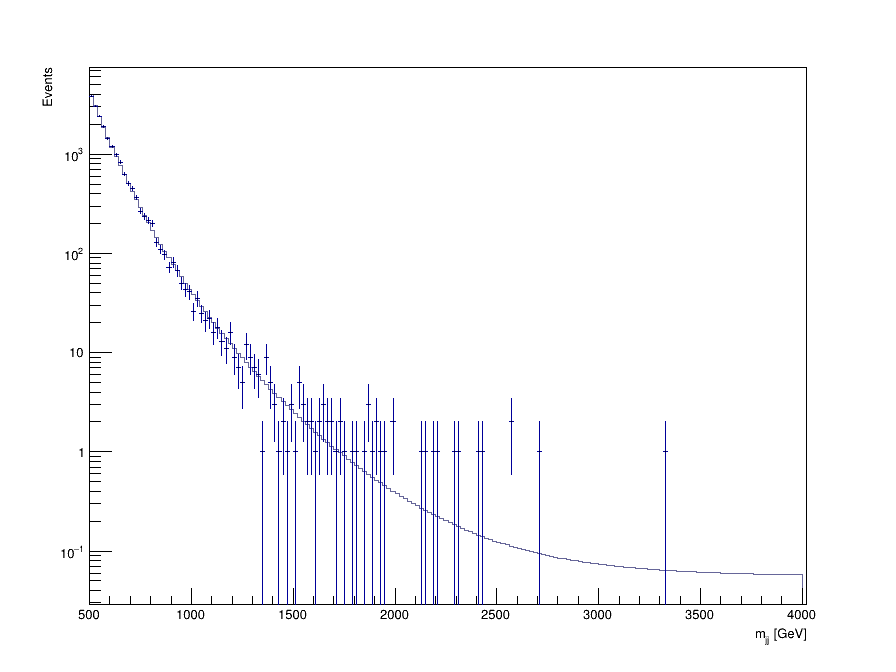

In [71]:
selectfile=files[13]
f=ROOT.TFile(selectfile,"r")
f1=ROOT.TFile(path1,"r")
histname=selectfile.split("/")[-1].split(".")[0]
bkg=f.Get("globalFitAlternate")
data=f1.Get(histname)
print histname
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
c1.cd()
bkg.Draw()
data.Draw("SAME")
c1.Draw()

#c1.SaveAs("figures1/"+histname+".jpg")